<a href="https://colab.research.google.com/github/minako-aino/MathMod/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛАБОРАТОРНА РОБОТА №1
ОЗНАЙОМЛЕННЯ З МОЖЛИВОСТЯМИ МОДЕЛЮВАННЯ ЗА ДОПОМОГОЮ ЗАСОБІВ PYTHON

In [ ]:
# libs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation
from sympy import symbols, I, re, im

In [ ]:
def init_fig_and_axes(limx, limy):
  # Create a figure and axes
  fig = plt.figure(figsize=(12, 5))
  ax = plt.subplot(1, 2, 1)
  txt_title = ax.set_title('')
  ax.set_xlim(limx[0], limx[1])
  ax.set_ylim(limy[0], limy[1])

  pt1 = ax.plot([], [], 'g.', ms=20)
  line3 = ax.plot([], [], 'y', lw=2)

  return ax, fig, txt_title

**Хід роботи:**

## 1.1.1. Фігури Лісажу

Побудувати за допомогою засобів Python модель, що імітує фігури Лісажу 1-го рангу (w1/w2=1). Продемонструвати, які зміни відбуваються в зображенні фігури при зміні різниці фаз коливань, охарактеризувати ці зміни.


In [ ]:
# Function to generate a Lissajous figure
def lissajous(a, b, phi, w1, w2):
    t = np.linspace(0, 2 * np.pi, 1000)
    x_t = a * np.cos(t * w1 + phi)
    y_t = b * np.cos(t * w2)
    return x_t, y_t

In [ ]:
def animate_lissajous(a, b, w1, w2):
  # function to initialize the figure plot
  def init_lissajous_plot():
      global lissajous_line
      lissajous_line, = ax.plot([], [], 'k', lw=2)
      return lissajous_line,

  # function to update the lissajous figure in each frame
  def update_lissajous(frame):
      phi = 2 * np.pi * frame / 100
      x_t, y_t = lissajous(a, b, phi, w1, w2)
      lissajous_line.set_data(x_t, y_t)
      txt_title.set_text(f'Phi = {round(phi, 2)}')
      return lissajous_line,

  lissajous_anim = animation.FuncAnimation(fig, update_lissajous, init_func=init_lissajous_plot, frames=100, interval=50, blit=False)
  return HTML(lissajous_anim.to_html5_video())

In [ ]:
lim = [-2.5, 2.5]

ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
# a = 1, b = 2, w1 = 5, w2 = 5
animate_lissajous(1, 2, 3, 3)

Для подальшого аналізу, створимо анімацію (для перегляду необхідно запустити відповідні клітинки). Бачимо, що овал стискається по діагоналям, що візуально нагадує обруч, що обертається.

Якого вигляду набуває фігура при w1/w2~=1?

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 10, 6)

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 10, 9)

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 10, 11)

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 10, 15)

Бачимо, що при зменшенні відношення, що чим далі від одиниці (в більшу або менше сторону), фігура стає більш простою.

Те ж саме виконати для фігур 2-го рангу (w1/w2=2).

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 20, 10)

При даному відношенні, фігура нагадує вігнуту вісімку, що обертається.

w1/w2~=2

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 20, 9.9)

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 20, 10.1)

У обох випадках, відношення є ірраціональним і фігури є аперіодичними.

Побудувати графік поліному Чебишева деякого, за власним вибором, порядку, 3 < n < 7.

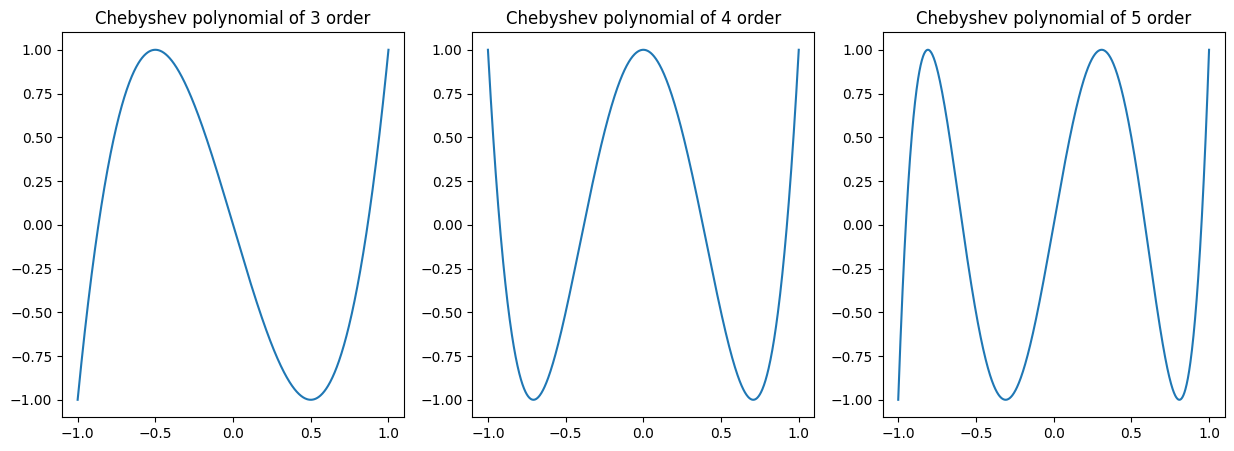

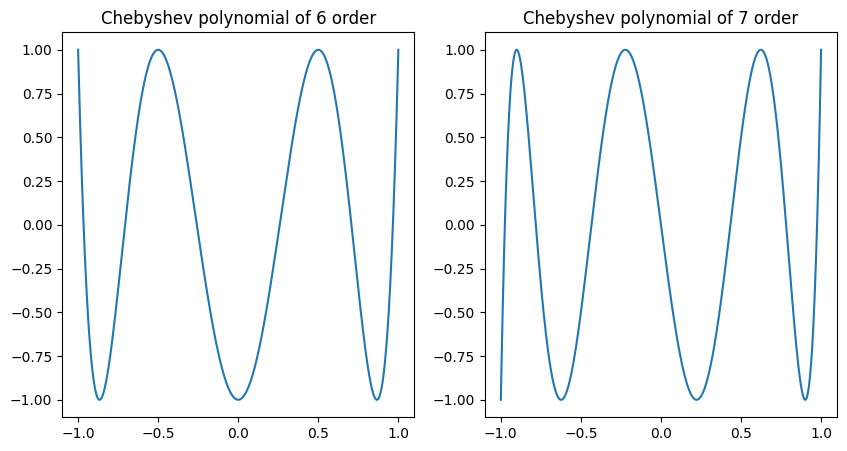

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(3 * 5, 5))
fig2, axes2 = plt.subplots(1, 2, figsize=(2 * 5, 5))

def chebyshev_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)

def build_chebyshev_polynomials(n):
    return [chebyshev_polynomial(i, x) for i in range(n + 1)]


def visualize_chebyshev_polynomial(axes, n, img):
    x = np.linspace(-1, 1, 1000)
    y = [chebyshev_polynomial(n, x) for x in x]
    axes[img].plot(x, y)
    axes[img].set_title(f"Сhebyshev polynomial of {n} order")


img = 0
for n in range(3, 6):
  visualize_chebyshev_polynomial(axes, n, img)
  img = img+1

img = 0
for n in range(6, 8):
  visualize_chebyshev_polynomial(axes2, n, img)
  img = img+1

plt.show()

Бачимо, що при збільшення порядку, фігура на графіку "стискається".

## 1.1.2. Годограф Михайлова

Побудувати модель, в який для дослідження на стійкість розв'язків лінійної системи диференціальних рівнянь використовується годограф Михайлова. Дослідити на стійкість одну з 15 наведених за виглядом характеристичного полінома систем, згідно з номером індивідуального варіанта. Номери варіантів співпадають із номерами у списку.

Завдання за варіантом:

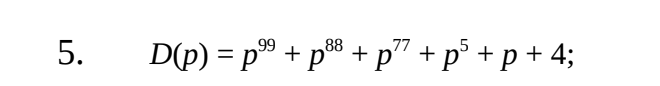

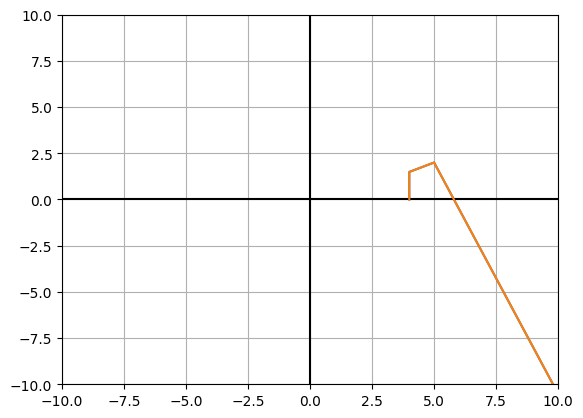

In [ ]:
w = symbols('w', real=True)

d = (I * w) ** 99 + (I * w) ** 88 + (I * w) ** 77 + (I * w) ** 5 + w * I + 4

# Create an array of w values
w_values = np.arange(0, 100, 0.1)

# Evaluate d for the array of w values
d_values = [d.subs({w: n}) for n in w_values]

# Extract the real and imaginary parts of d_values
x = [re(val) for val in d_values]
y = [im(val) for val in d_values]

# Plot the real and imaginary parts
plt.axis([-10, 10, -10, 10])
plt.plot(x, y)
plt.plot([-10, 10], [0,0], color = "black")
plt.plot([0, 0], [-10, 10], color = "black")
plt.plot(x, y)
plt.grid(True)
plt.show()

За графічним критерієм Михайлова система не є стійкою, оскільки годограф проходить першу і четверту чверть і не йде далі. Аби впевнитись, збільшимо масштаб:

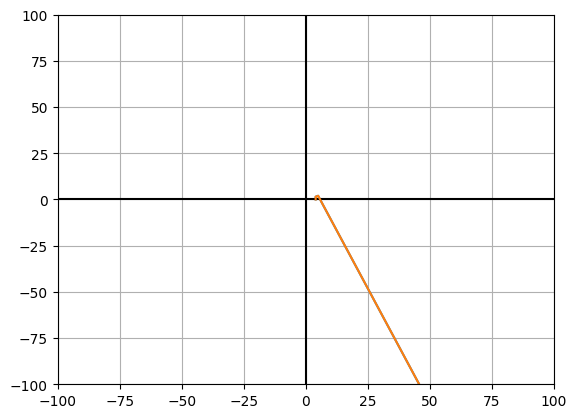

In [ ]:
w = symbols('w', real=True)

d = (I * w) ** 99 + (I * w) ** 88 + (I * w) ** 77 + (I * w) ** 5 + w * I + 4

# Create an array of w values
w_values = np.arange(0, 100, 0.1)

# Evaluate d for the array of w values
d_values = [d.subs({w: n}) for n in w_values]

# Extract the real and imaginary parts of d_values
x = [re(val) for val in d_values]
y = [im(val) for val in d_values]

# Plot the real and imaginary parts
plt.axis([-100, 100, -100, 100])
plt.plot(x, y)
plt.plot([-100, 100], [0,0], color = "black")
plt.plot([0, 0], [-100, 100], color = "black")
plt.plot(x, y)
plt.grid(True)
plt.show()

## Контрольні питання

1.5.1. Який вигляд повинні мати фігури Лісажу при раціональному та ірраціональному співвідношенні частот?


При **раціональному** співвідношенні частот фігури Лісажу є періодичними. Це означає, що вони повторюються через певний проміжок часу.

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, 2, 3)

При ірраціональному співвідношенні частот фігури Лісажу є апериодичними і мають більш складну форму.

In [ ]:
ax.clear()

lim = [-2.5, 2.5]
ax, fig, txt_title = init_fig_and_axes(lim, lim)

In [ ]:
animate_lissajous(1, 2, np.pi, np.exp(1))

1.5.2. Навести приклад стійкої системи рівнянь не менш ніж 3-го порядку та продемонструвати її
стійкість за критерієм Михайлова.


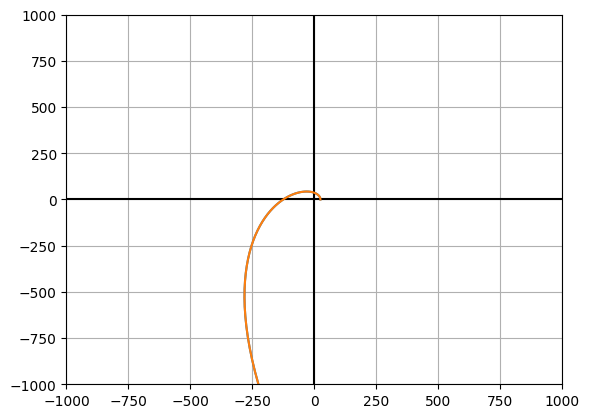

In [ ]:
w = symbols('w', real=True)

d = (I * w)**4 + 10*(I * w)**3 + 35*(I * w)**2 + 50*(I * w) + 24

# Create an array of w values
w_values = np.arange(0, 100, 0.1)

# Evaluate d for the array of w values
d_values = [d.subs({w: n}) for n in w_values]

# Extract the real and imaginary parts of d_values
x = [re(val) for val in d_values]
y = [im(val) for val in d_values]

# Plot the real and imaginary parts
plt.axis([-1000, 1000, -1000, 1000])
plt.plot(x, y)
plt.plot([-1000, 1000], [0,0], color = "black")
plt.plot([0, 0], [-1000, 1000], color = "black")
plt.plot(x, y)
plt.grid(True)
plt.show()